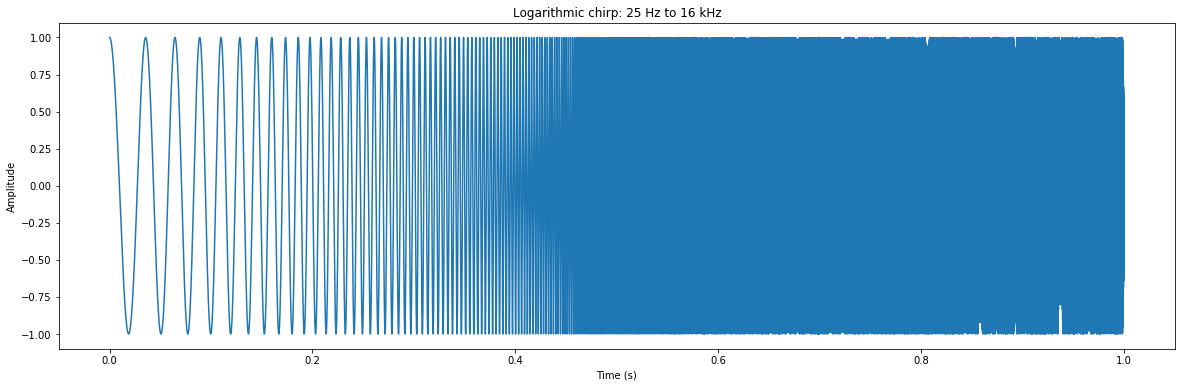

In [25]:
%matplotlib inline

import scipy
import scipy.signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

xs = np.linspace(0, 1, 32000)
ys = scipy.signal.chirp(xs, 25, 1, 16000, method='logarithmic')


f = plt.figure(figsize=(20, 6))
ax = f.add_subplot(1, 1, 1,
                   title='Logarithmic chirp: 25 Hz to 16 kHz',
                   xlabel='Time (s)', ylabel='Amplitude')
ax.plot(xs, ys)

import IPython.display

IPython.display.Audio(ys, rate=32000)


In [19]:
fs = 32000
fs_nyquist = fs // 2
order = 4
fstop1 = 300 / fs_nyquist
fstop2 = 800 / fs_nyquist

ba = scipy.signal.butter(order, (fstop1, fstop2), btype='bandpass', analog=False, output='ba')
sos = scipy.signal.butter(order, (fstop1, fstop2), btype='bandpass', analog=False, output='sos')
print(ba)
print()
print(sos)
print()
print(sum(len(a) for a in sos))

(array([ 0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.]), array([  1.        ,  -7.98612488,  27.91682148, -55.79216183,
        69.72293046, -55.79216183,  27.91682148,  -7.98612488,
         1.        ]))

[[ 0.          0.          0.          1.         -1.99653122  1.        ]
 [ 1.          2.          1.          1.         -1.99653122  1.        ]
 [ 1.         -2.          1.          1.         -1.99653122  1.        ]
 [ 1.         -2.          1.          1.         -1.99653122  1.        ]]

24


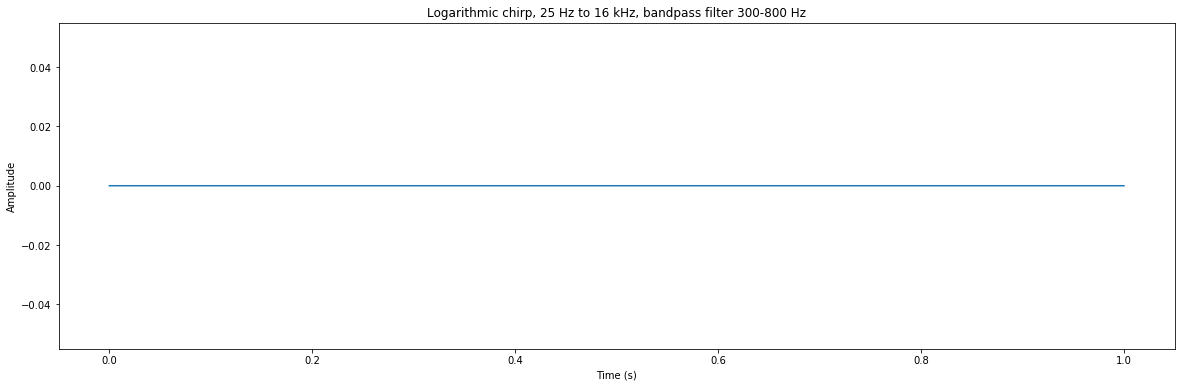

In [28]:
ys_filt = scipy.signal.sosfilt(sos, ys)
f = plt.figure(figsize=(20, 6))
ax = f.add_subplot(1, 1, 1,
                   title='Logarithmic chirp, 25 Hz to 16 kHz, bandpass filter 300-800 Hz',
                   xlabel='Time (s)', ylabel='Amplitude')
ax.plot(xs, ys_filt)